# 反因果零相位滤波器的实现

在FIR滤波器的情况下，可以设计线性相位滤波器，当应用于数据时（使用filter/lfilter或conv/convolve），只需将输出延迟固定数量的采样。然而，对于IIR滤波器，相位失真通常是高度非线性的。filtfilt函数使用当前点前后信号中的信息，本质上是“看到未来”，以消除相位失真

要了解filtfilt是如何做到这一点的，回想一下，如果实序列$x(n)$的Z变换是$X(z)$，那么时间反转序列$x(-n)$的Z变换就是$X(z^{-1})$。考虑下面的处理方案：

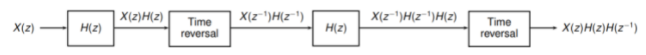

当$|z|=1$，其中$z=e^{j\omega}$，此时输出减少到$X(e^{j\omega}){\left|H(e^{j\omega})\right|}^2$。给定序列$x(n)$的所有样本，可以得到具有零相位失真的双滤波版本的x。

例如，以100Hz采样的1秒持续时间信号，由3Hz和40Hz的两个正弦分量组成，是

In [1]:
import numpy as np 
from scipy import signal 
import matplotlib.pyplot as plt  

fs = 100 
t = np.arange(0,1+1/fs,1/fs) 
x = np.sin(2*np.pi*t*3)+0.25*np.sin(2*np.pi*t*40)

现在创建一个6阶巴特沃斯低通滤波器来滤除高频正弦波。使用**filter/lfilter**和**filtfilt**进行比较的过滤器x：

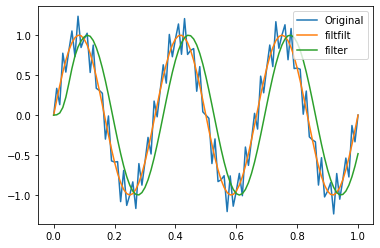

In [2]:
b,a = signal.butter(6,20/(fs/2))  

y = signal.filtfilt(b,a,x) 
zi = signal.lfilter_zi(b,a)*0 
yy = signal.lfilter(b,a,x)  

fig,ax = plt.subplots() 
ax.plot(t,x,t,y,t,yy) 
ax.legend(['Original','filtfilt','filter'],loc='upper right')

两种滤波版本都消除了原始信号中明显的40 Hz正弦波。该图还显示了**filter**和**filtfilt**的区别。**filtfilt**线与原来的3 Hz正弦波同相，而**filter/lfilter**线延迟。**filter/lfilter**线在早期显示瞬态。**filtfilt**通过仔细选择初始条件，并在输入序列上预加一个短的、反射的输入序列片段，来减少滤波器启动瞬变。

为了获得最佳效果，请确保要滤波的序列的长度至少是滤波器序列的三倍，并且在信号两边逐渐变为零。